# GeoPandas - Parte 1

### Bibliotecas e outras inicializações

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install --upgrade geopandas

Requirement already up-to-date: geopandas in /usr/local/lib/python3.7/dist-packages (0.9.0)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, Point, LineString, MultiPolygon
%matplotlib inline

## Entendendo o funcionamento do GeoPandas

### Fonte de dados

In [4]:
rj = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Alura/Mapas/RJ/33MUE250GC_SIR.shp')
type(rj)

geopandas.geodataframe.GeoDataFrame

In [5]:
rj.head()

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


### Primeiro Mapa

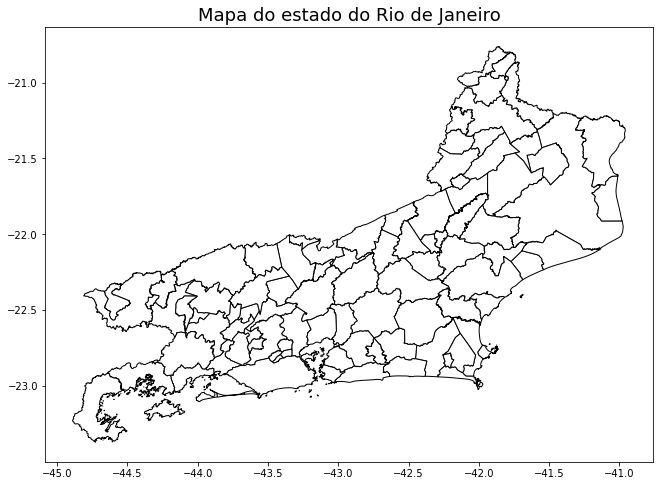

In [6]:
rj.plot(color='white', edgecolor='black', figsize=(15, 8))
plt.title('Mapa do estado do Rio de Janeiro', y=1.09, fontsize=18)
plt.show()

### Polígonos, pontos e outros shapes

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3    LINESTRING (0.00000 1.00000, 3.00000 0.00000, ...
4                              POINT (0.50000 0.50000)
5    MULTIPOLYGON (((1.00000 0.00000, 1.50000 0.400...
dtype: geometry 



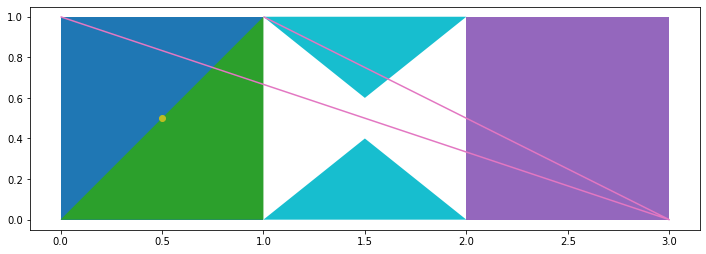

In [7]:
p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

p4 = LineString([(0, 1), (3, 0), (1, 1)])

p5 = Point(0.5, 0.5)

p6 = Polygon([(1, 0), (1.5, 0.4), (2, 0)])
p7 = Polygon([(1, 1), (1.5, 0.6), (2, 1)])
p8 = MultiPolygon([p6, p7])

g = gpd.GeoSeries([p1, p2, p3, p4, p5, p8])
print(g, '\n')
g.plot(cmap='tab10', figsize=(12, 6))
plt.show()

### Shapefiles

In [8]:
rj.head()

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


In [9]:
rj = rj.query('NM_MUNICIP=="RIO DE JANEIRO"')
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


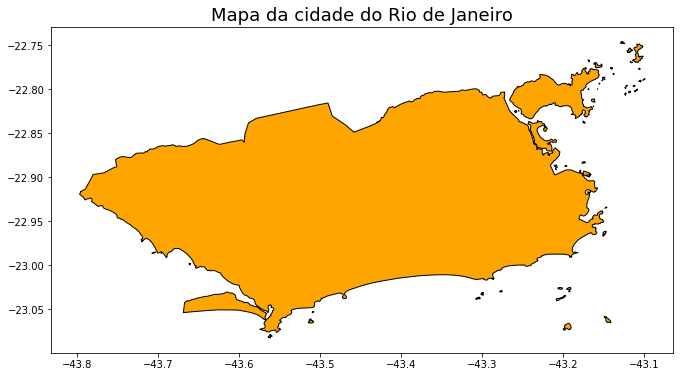

In [10]:
rj.plot(color='orange', edgecolor='black', figsize=(12, 6))
plt.title('Mapa da cidade do Rio de Janeiro', y=1.09, fontsize=18)
plt.show()

#### Salvando o arquivo

In [11]:
import os
dir = '/content/drive/MyDrive/Colab Notebooks/Alura/Mapas/RJ-MUNIC'
if not os.path.exists(dir):
  os.makedirs(dir)
rj.to_file(dir+'/RJ-MUNIC.shp')

### Preparação dos dados

In [12]:
dados = pd.read_table('/content/drive/MyDrive/Colab Notebooks/Alura/dados.txt')
dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000


#### Transformando em GeoDataFrame

In [13]:
geometry = [Point(x) for x in zip(dados.Longitude, dados.Latitude)]
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

geo_dados = gpd.GeoDataFrame(dados, crs=crs, geometry=geometry)
geo_dados.to_file('/content/drive/MyDrive/Colab Notebooks/Alura/Mapas/RJ-DATASET/DATASET.shp')
geo_dados.head(2)

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.46295 -23.01646)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.33691 -22.94320)


#### Modificando o CRS dos arquivos

In [14]:
rj.head(2)

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


In [15]:
rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
rj.to_file(dir+'/RJ-MUNIC.shp')

In [17]:
geo_dados.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
geo_dados.to_file('/content/drive/MyDrive/Colab Notebooks/Alura/Mapas/RJ-DATASET/DATASET.shp')

In [19]:
rj.crs == geo_dados.crs

True

### Tratamento dos dados

#### Identificando outliers

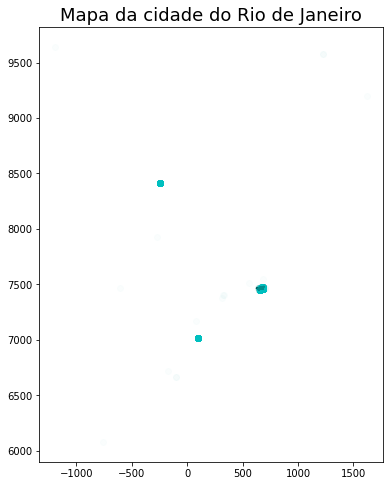

In [20]:
base = rj.plot(color='black', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, figsize=(15, 8), alpha=0.02, color='c')
plt.title('Mapa da cidade do Rio de Janeiro', y=1.09, fontsize=18)
plt.show()

#### Selecionando dados de uma região

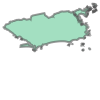

In [21]:
rj.iloc[0]['geometry']

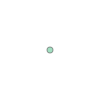

In [22]:
geo_dados.iloc[0]['geometry']

(4513, 14)


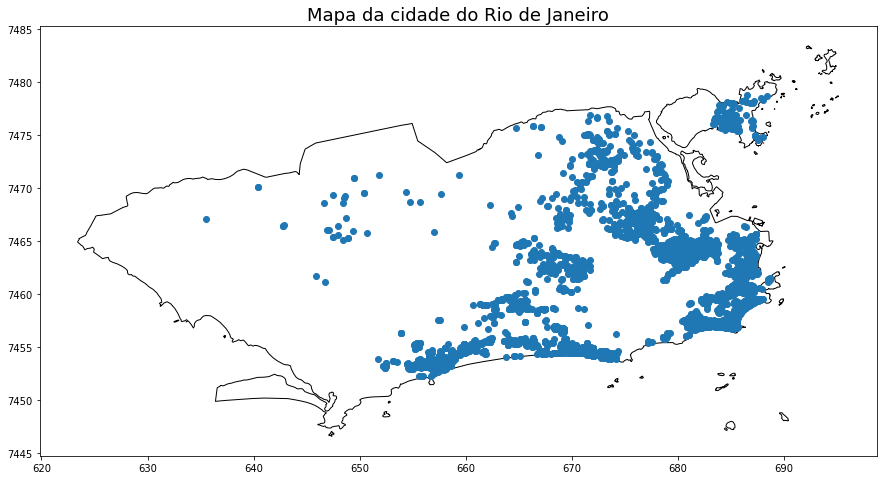

In [23]:
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0]['geometry'])]
print(geo_dados.shape)

base = rj.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, figsize=(15, 8), alpha=1)
plt.title('Mapa da cidade do Rio de Janeiro', y=1.09, fontsize=18)
plt.show()

### Adicionando dados de estações de metrô

In [25]:
metro = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Alura/Estações_Metrô.geojson')
metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs', inplace=True)
metro.head(1)

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,Status,Data_Inc,Flg_Linha4,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,None,None,0,1,0,0,None,0,None,0,None,1998,POINT (667.827 7476.959)


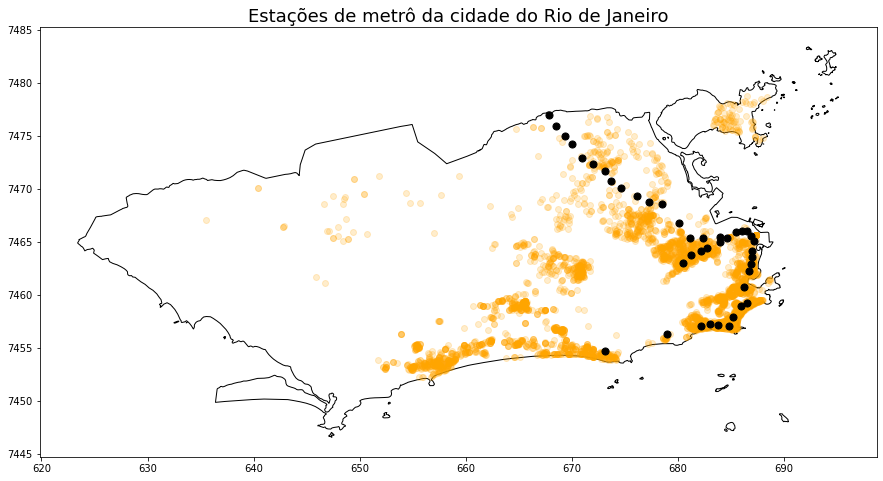

In [26]:
base = rj.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize=50)
plt.title('Estações de metrô da cidade do Rio de Janeiro', y=1.09, fontsize=18)
plt.show()

#### Estação de metrô mais próxima

In [30]:
geo_dados['Dist_metro'] = geo_dados['geometry'].apply(lambda x : metro.distance(x).min())
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_metro
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159


In [32]:
geo_dados['Valor'].corr(geo_dados['Dist_metro'])

-0.195640831616868